Import Py files from Repo

In [1]:
from importlib import reload
from IPython.display import Image

import pandas as pd
pd.set_option('display.max_columns', None)

from QuocAnh_py.others.install_packages import import_or_install_packages
import_or_install_packages()

In [2]:
from QuocAnh_py.execute.init import import_settings

import QuocAnh_py.others.shortcuts as sc
reload(sc)
import QuocAnh_py.others.utilities as ult
reload(ult)

from QuocAnh_py.execute.init import get_df

import QuocAnh_py.dj.best_next_tracks
reload(QuocAnh_py.dj.best_next_tracks)
from QuocAnh_py.dj.best_next_tracks import run_best_next_tracks

import QuocAnh_py.dj.sorting_playlist
reload(QuocAnh_py.dj.sorting_playlist)
from QuocAnh_py.dj.sorting_playlist import sort_playlist

import QuocAnh_py.models.common_text_score
reload(QuocAnh_py.models.common_text_score)
from QuocAnh_py.models.common_text_score import run_common_text_score

import QuocAnh_py.models.harmonic_keys
reload(QuocAnh_py.models.harmonic_keys)
from QuocAnh_py.models.harmonic_keys import run_harmonic_tracks, key_translate

import QuocAnh_py.models.nearest_neighbor
reload(QuocAnh_py.models.nearest_neighbor)
from QuocAnh_py.models.nearest_neighbor import run_nearest_neighbor

import  QuocAnh_py.others.plots as myplts
reload(myplts) 

import QuocAnh_py.spotify.spotify_crawling as spc
from QuocAnh_py.spotify.spotify_playlist_import_export import export_playlist

from QuocAnh_py.spotify.spotify_api import sp

Test Functions

In [ ]:
artist = ""
track_name = "who let the dogs out"
album = ""

test_track = spc.get_track_data_from_search(track_name, artist)
print('Get track data from search:')
track_data = spc.get_tracks_data(test_track)
display(track_data)

print('Get artist data from artist id: ')
artist_id = test_track["artists"][0]["id"]
artist_data = spc.get_artist(artist_id)
display(artist_data)

print('Get track audio data from track id: ')
track_id = test_track['id']
audio = sp.audio_features(track_id)
track_audio = spc.get_tracks_audio_features(audio[0])
display(track_audio)

Import Playlist (Spotify API only allows to pull 99 tracks per playlist)

In [3]:
df = get_df(playlist_import=False) 

Getting the Spotify playlist data from ./data/spotify_playlist_data.csv


Input

In [4]:
search_keyword = "yellow"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]
display(found_df)

,track_name,artist,artist_id,album,album_id,album_releasedate,track_popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres,artist_popularity,playlist_id,playlist_name,playlist_owner,playlist_owner_id,duration_min,translated_key,year_released
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3AJwUDP919kvQ9QcozQPxg,Yellow,Coldplay,4gzpq5DPGxSnKTe4SA8HAU,Parachutes,6ZG5lRT77aJ3btmArcykra,7/10/2000,89,266773,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.234,0.285,173.372,permanent wave | pop,84,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,4.45,B,2000


Seasborn Pairplot Matrix

In [ ]:
search_keyword = "yellow"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

myplts.corre_plot(df, found_index, "Imported Playlist")

In [ ]:
myplts.wordcloud_plot(df['artist_genres'])

In [ ]:
Image(filename='.\\data\\images\\best_next_track1.png')

In [ ]:
search_keyword = "rolling in the deep"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

common_genres_tracks_test = run_common_text_score(df, found_index, print_add_cols=True)
display(common_genres_tracks_test)

Harmonic Keys

In [ ]:
Image(filename='.\\data\\images\\camelot_wheel.png')

In [ ]:
Image(filename='.\\data\\images\\key_mixing.png')

In [ ]:
search_keyword = "flowers"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

print(f"The track '{ult.get_data_from_index(df, found_index, 'track_name')}' by '{ult.get_data_from_index(df, found_index, 'artist')}' is in the key '{key_translate(df.loc[found_index,'key'], df.loc[found_index,'mode'])}'. Compatible scales are: ")

harmonic_tracks_test = run_harmonic_tracks(df, found_index, grouped=True, drop_dups_cols=False)
display(harmonic_tracks_test)

Nearest Neighbor

In [ ]:
search_keyword = "flowers"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

nn_tracks_test = run_nearest_neighbor(df, found_index, print_input_msg=True, print_add_cols=True)
display(nn_tracks_test)

Best Next Tracks

In [ ]:
Image(filename='.\\data\\images\\best_next_track2.png')

In [ ]:
search_keyword = "flowers"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

found_best_next_track = run_best_next_tracks(df, found_index, used_track = [], remove_input_track= False, print_add_cols=True, print_msg=True)
display(found_best_next_track)

Sort Playlist

In [9]:
import QuocAnh_py.dj.sorting_playlist as sp
reload(sp)
from QuocAnh_py.dj.sorting_playlist import sort_playlist

In [14]:
search_keyword = "yellow"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

my_playlist = sort_playlist(df, found_index, print_msg=True)
display(my_playlist)

Selecting the intersection of all keys: common_text_score|harmonic_keys|nearest_neighbor
Track input 3AJwUDP919kvQ9QcozQPxg, '['Yellow']'
Apply randomization from settings.json
Choosing the best next track by selecting the first index
Searching ['Yellow']'s best next track
Selecting the intersection of all keys: common_text_score|harmonic_keys|nearest_neighbor
Searching ['Blinding Lights']'s best next track
Selecting the intersection of all keys: common_text_score|harmonic_keys|nearest_neighbor
Searching ['Heart Attack']'s best next track
The model results from '['Heart Attack']' don't have any intersection besides the input index. Moving on to applying preferred order
Key common_text_score|nearest_neighbor has no intersection or the input index is not in it
Select track from intersection: harmonic_keys|nearest_neighbor
Searching ['Cruel Summer']'s best next track
Selecting the intersection of all keys: common_text_score|harmonic_keys|nearest_neighbor
Searching ['As It Was']'s best nex

,track_name,artist,artist_id,album,album_id,album_releasedate,track_popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres,artist_popularity,playlist_id,playlist_name,playlist_owner,playlist_owner_id,duration_min,translated_key,year_released,word_match_score,key_compatible,mode_compatible,camelot_mvmt,translated_energy,translated_mood,energy_mvmt,mood_mvmt,desc,nn_score,nn_index_position,intersection,intersection_num,order,cum_duration
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3AJwUDP919kvQ9QcozQPxg,Yellow,Coldplay,4gzpq5DPGxSnKTe4SA8HAU,Parachutes,6ZG5lRT77aJ3btmArcykra,7/10/2000,89,266773,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,permanent wave | pop,84,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,4.45,B,2000,100.0,11.0,1.0,0.0,Perfectly harmonic,Same,0.0,0.0,Same scale,0.000000,0.0,common_text_score|harmonic_keys|nearest_neighbor,3,0.0,4.45
0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,1Xyo4u8uXC1ZmMpatF05PJ,After Hours,4yP0hdKOZPNshxUOjY0cZj,3/20/2020,90,200040,0.513,0.730,1,-5.940,1,0.0598,0.00143,0.000095,0.0897,0.334,171.001,canadian contemporary r&b | canadian pop | pop,91,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.33,C#,2020,1.0,1.0,1.0,2.0,Raise energy,Same,1.0,0.0,Up whole step,1.762600,4.0,common_text_score|harmonic_keys|nearest_neighbor,3,1.0,7.78
1V6gIisPpYqgFeWbMLI0bA,Heart Attack,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,Demi,6Kssm2LosQ0WyLukFZkEG5,1/1/2013,80,210840,0.504,0.785,8,-4.802,1,0.1040,0.07380,0.000000,0.2390,0.502,173.968,pop | post-teen pop,73,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.51,G#,2013,1.5,8.0,1.0,1.0,Raise energy,Same,1.0,0.0,Up a fifth,0.991875,2.0,common_text_score|harmonic_keys|nearest_neighbor,3,2.0,11.29
1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,06HL4z0CvFAxyc27GXpf02,Lover,1NAmidJlEaVgA3MpcPFYGq,8/23/2019,95,178426,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,pop,100,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,2.97,A,2019,NaN,9.0,1.0,7.0,Raise energy,Same,1.0,0.0,Up half step,0.775171,1.0,harmonic_keys|nearest_neighbor,2,3.0,14.26
4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,6KImCVD70vtIoJWnq6nGn3,Harry's House,5r36AJ6VOJtp00oxSkBZ5h,5/20/2022,91,167303,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,pop,81,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,2.79,F#m,2022,1.0,6.0,0.0,0.0,Perfectly harmonic,Darken,0.0,-1.0,Tonal shift,1.015057,1.0,common_text_score|harmonic_keys|nearest_neighbor,3,4.0,17.05
1zB4vmk8tFRmM9UULNzbLB,Thunder,Imagine Dragons,53XhwfbYqKCa1cC15pYq2q,Evolve,33pt9HBdGlAbRGBHQgsZsU,6/23/2017,86,187146,0.604,0.822,0,-4.833,1,0.0438,0.00672,0.134000,0.1470,0.288,167.997,modern rock | pop | rock,84,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.12,C,2017,1.0,0.0,1.0,3.0,Raise energy,Brighten,1.0,1.0,Minor to Major,2.169166,8.0,common_text_score|harmonic_keys|nearest_neighbor,3,5.0,20.17
58ge6dfP91o9oXMzq3XkIS,505,Arctic Monkeys,7Ln80lUS6He07XvHI8qqHH,Favourite Worst Nightmare (Standard Version),6rsQnwaoJHxXJRCDBPkBRw,4/24/2007,80,253586,0.520,0.852,0,-5.866,1,0.0543,0.00237,0.000058,0.0733,0.234,140.267,garage rock | modern rock | permanent wave | r...,82,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,4.23,C,2007,2.0,0.0,1.0,0.0,Perfectly harmonic,Same,0.0,0.0,Same scale,1.540691,4.0,common_text_score|harmonic_keys|nearest_neighbor,3,6.0,24.40
4JiEyzf0Md7KEFFGWDDdCr,Knockin' On Heaven's Door,Guns N' Roses,3qm84nBOXUEQ2vnTfUTTFC,Use Your Illusion II,00eiw4KOJZ7eC3NBEpmH4C,9/18/1991,79,336000,0.496,0.739,6,-7.193,1,0.0416,0.02090,0.004510,0.1060,0.377,132.411,glam metal | hard rock | rock,76,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,5.60,F#,1991,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.567582,9.0,common_text_score|nearest_neighbor,2,7.0,30.00


Plot Playlist

<module 'matplotlib.pyplot' from 'c:\\Users\\anhqu\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

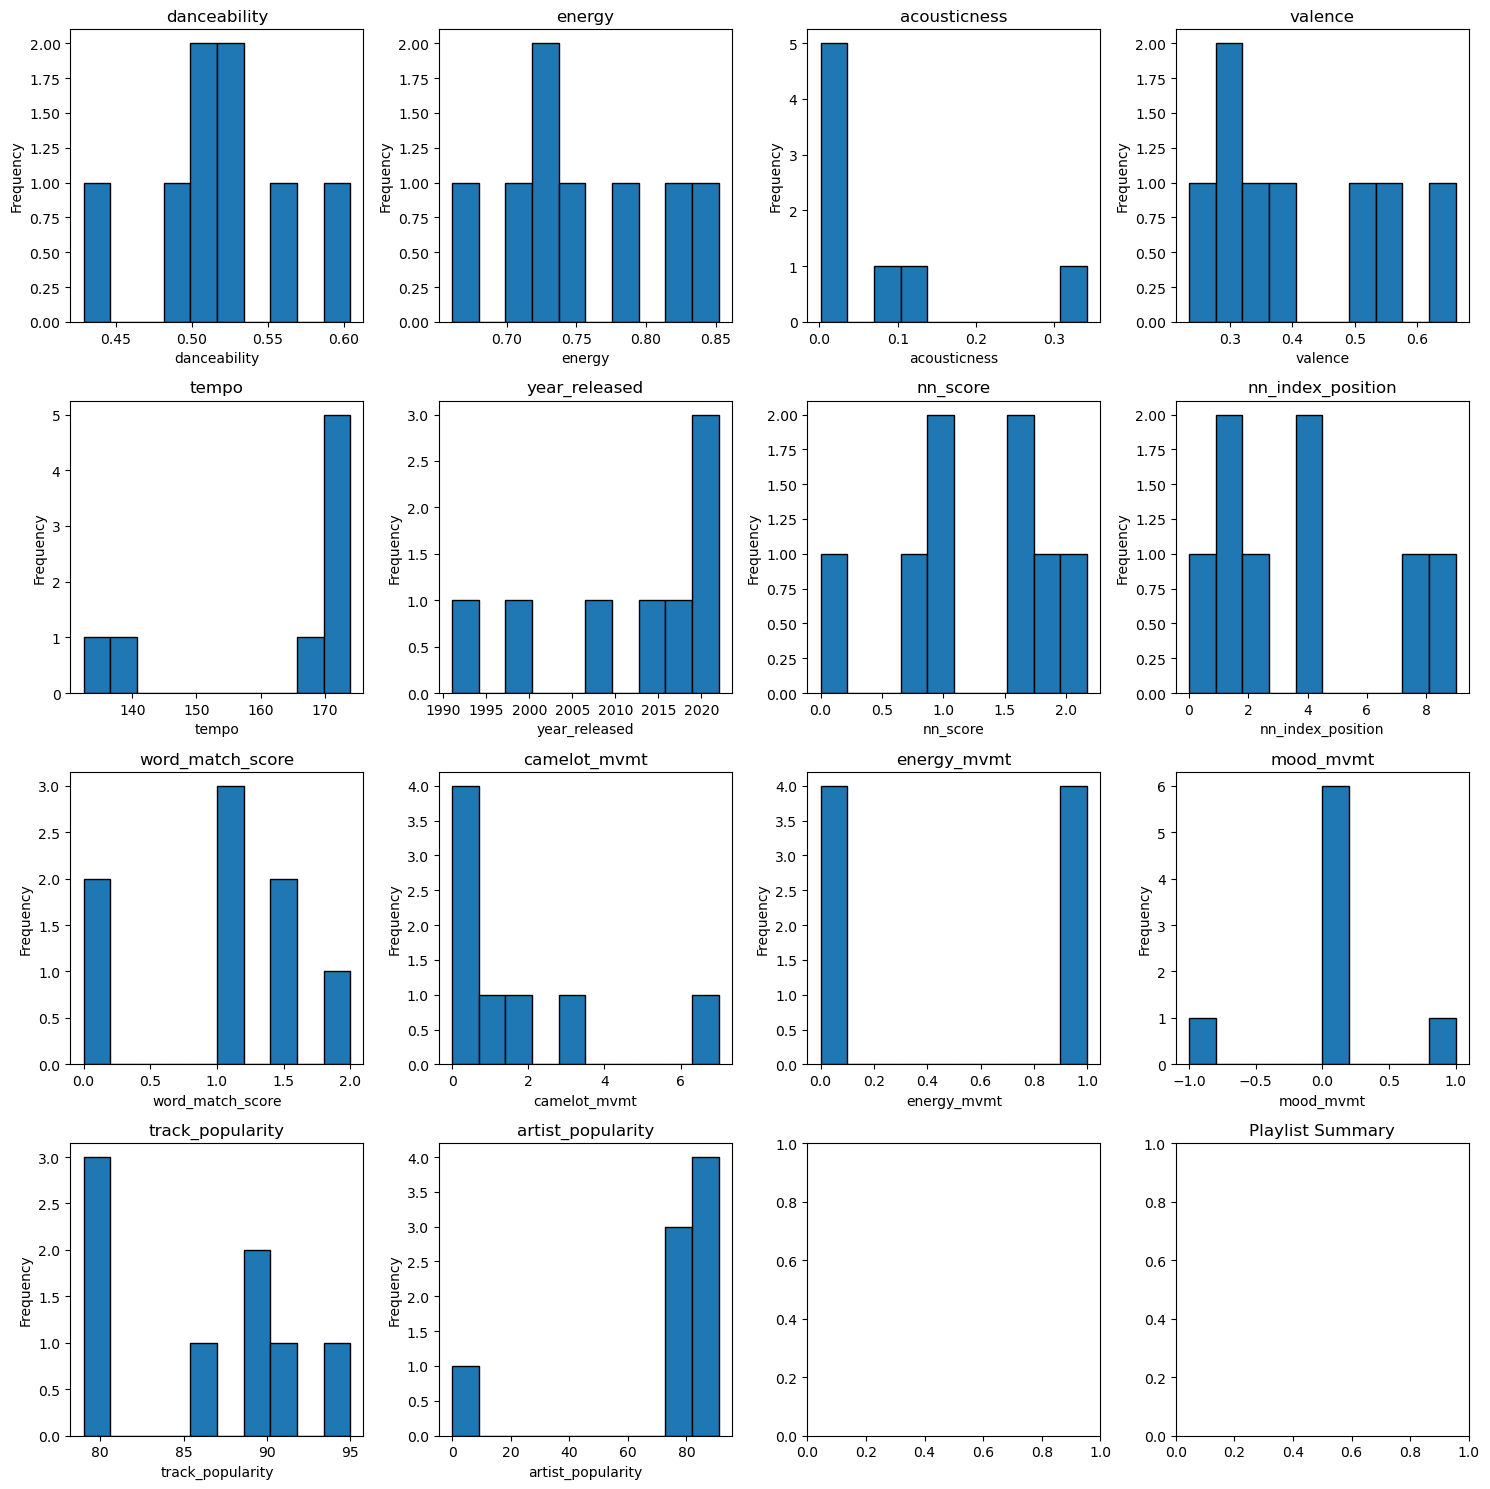

In [15]:
myplts.playlist_summary(my_playlist)

<module 'matplotlib.pyplot' from 'c:\\Users\\anhqu\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

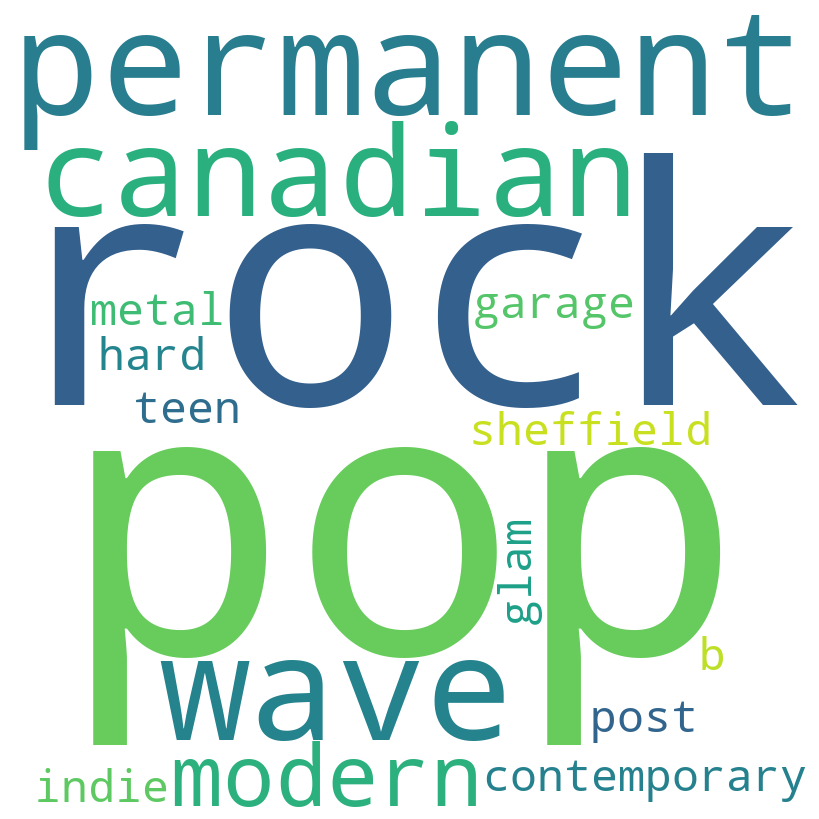

In [16]:
myplts.wordcloud_plot(my_playlist['artist_genres'])

In [17]:
myplts.plot_my_playlist(my_playlist, "My Awesome Mixtape vol.1")

Create Playlist

In [ ]:
export_playlist("Quoc-Anh's awesome mixtape vol.1", my_playlist.index.tolist())